# Classification avec k-neighbors 

## Chargement du dataset

In [4]:
import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# charger les données du dataset iris

iris = datasets.load_iris()

2. Dans la deuxième étape, on procède à l'exploration des données. Les dimensions du dataset iris sont affichées comme suit

## Shape des données

In [5]:
# data represent les predicteurs et target la cible a predire

print(iris.data.shape)
print(iris.target.shape)



(150, 4)
(150,)


3.	On sélectionne tous les prédicteurs du dataset existant iris comme montré ci-dessous

## Selection de feature-prédicteurs

In [6]:
# On prend en compte tous les predicteurs

X = iris.data
# On considere aussi la clase a predire/determiner

y = iris.target

4. On décompose maintenant le dataset en ensemble d'apprentissage et test avec une séparation de 75%, soit

## Décomposition en apprentissage/test (training/test)

In [7]:
from sklearn.model_selection import train_test_split
# Décomposer les données prédicteurs en training/testing

X_train, X_test, y_train, y_test = \
train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 33)

ce qui donne pour les deux ensembles les résultats suivants:

In [8]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(112, 4) (38, 4) (112,) (38,)


5.	On procède maintenant à l'instantiation du modèle KNN comme suit:

## Developper le modele k-nearest neightbor

- Choisir une valuer pour k
- Trouver les voisins k dans l'ensemble d'apprentissage qui soit le plus proche
- Prendre une distance wuclidianne comme la mesure dedistance entre les instances
- Une fois que les k voisins soient trouvers, prendre la classe la plus populaire

Le code nécessaire pour le modèle est alors:

In [ ]:
# Creer l'objet Neighbours Classifier
# On considere KNN avec ponderation uniforme
weights = 'uniform'
k_neighbors = 15
clf = neighbors.KNeighborsClassifier(k_neighbors,weights = weights)

Dans ce cas, on voit que les poids des coefficients sont choisis de manière uniforme et k=15. Vous aurez à tester l'algorithme avec k=1 pour vérifier la performance de votre algorithme dans une autre manipulation.

## Proceder a l'apprentissage du modele

In [ ]:
# Faire apprendre le model en utilisant les training set

clf.fit(X_train,y_train)

On constate que la distance critère par défaut est "minkowski"

6.  On évalue maintenant la performance de l’algorithme utilisé comme suit en utilisant l'echantillon  d'apprentissage, soit X_train



## Prediction avec le model obtenu

In [ ]:
# Prendre la classe pour toutes les observations dans X_train

Z = clf.predict(X_train)

print(Z.shape)

# Comparer les classe predictes avec les vrais labels de la classe

accurancy = clf.score(X_train, y_train)

print("Accurancy du model predit:",str(accurancy))

7.  On évalue maintenant la performance de l’algorithme utilisé comme suit en utilisant l'echantillon  test, soit X_test

In [ ]:
# Make classe predictio for all observations in X test

Z = clf.predict(X_test)

print(Z.shape)
# Compared predicted class labels with actual class labels

accurancy = clf.score(X_test,y_test)
print("Accurancy du model predit sur le test:",str(accurancy))

8.  On évalue maintenant la performance de l’algorithme utilisé comme suit en utilisant un echantillon out-of-sample

In [ ]:
# Utilisation pour prediction d'un echantillon out-of-sample

ech = [[3,5,4,2],[5,4,3,2]]
Z = clf.predict(ech)
print(Z.shape)
print(Z)

De ce fait, la classe cible pour chacun des deux échantillons est 1. Il suffit d'évaluer le dataset iris pour relier la classe 1 à la vraie espèce d'iris.

## Manipulation 2:   Évaluation de la performance de l'algorithme kNN avec différentes valeurs de k

In [11]:
# Créer un objet Neighbours Classifier

# On considere KNN avec ponderation uniforme

weights = 'uniform'
k_neighbors = 15

clf = neighbors.KNeighborsClassifier(k_neighbors,weights = weights)

2. On procède à l'apprentissage du modèle comme d'habitude

## Procéder à l'apprentissage du modèle

In [12]:
# faire apprendre le modele en utilisant le training set

clf.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

On évalue ensuite le score accuracy

## Prédiction avec le modèle obtenu

In [16]:
# Faire une prédiction de classe pour toutes les observations dans X

y_knn = clf.predict(X)

print(y_knn.shape)

# comparer les labels de la classe predict avec les vrais labels de la classe

from sklearn import metrics

accuracy_knn = metrics.accuracy_score(y,y_knn)

print("Accuracy du modèle prédict " + str(accuracy_knn))

(150,)
Accuracy du modèle prédict 0.9866666666666667


On détermine l'accuracy pour l'approche logistic regression, ce qui donne:

## Utiliser logistic regression pour comparaison

In [24]:
from sklearn.linear_model import LogisticRegression

clf_logr = LogisticRegression()
clf_logr.fit(X,y)

y_logR = clf_logr.predict(X)
accuracy_logR = metrics.accuracy_score(y,y_logR)
print('Accuracy du modèle prédict '+ str(accuracy_logR))

Accuracy du modèle prédict 0.9733333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


On constate que pour les paramètres actuels, l'algorithme KNN performe mieux que l'algorithme logistic regression.

On évalue maintenant la performance avec un split du dataset en échantillon d'apprentissage et test avec coupure à 80%

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

On refait le même calcul d'accuracy et on aura pour les deux algorithmes

In [36]:
# knn

clf.fit(X_train,y_train)
y_knn = clf.predict(X_test)

accuracy_knn = metrics.accuracy_score(y_test,y_knn)
print('Accuracy du modele KNN predict ',str(accuracy_knn))


#logR

clf_logr.fit(X_train,y_train)
y_logr = clf_logr.predict(X_test)
accuracy_logr = metrics.accuracy_score(y_test,y_logr)
print('Accuracy du modele KNN predict ',str(accuracy_logr))


Accuracy du modele KNN predict  1.0
Accuracy du modele KNN predict  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
## Determiner accurancy pour k varaiables

# k 1 à k 30

k_range = range(1,26)
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

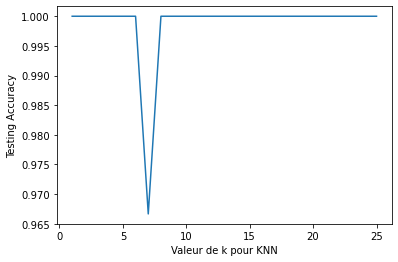

In [39]:
# Tracer le graphe

import matplotlib.pyplot as plt

%matplotlib inline

# plot de k vs testing accuracy

plt.plot(k_range,scores)
plt.xlabel('Valeur de k pour KNN')
plt.ylabel('Testing Accuracy')